Imports and Configuration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: to display all columns in a dataframe
# pd.set_option('display.max_columns', None)
# Optional: seaborn styling
sns.set_theme(style="whitegrid")
pd.set_option('display.max_columns', None)

print("Libraries imported successfully.")

Libraries imported successfully.


Load the Data

In [2]:
# Define the path to your data file
# ../data/ goes up one directory from 'notebooks' then into 'data'
file_path = '/home/jul/Proyects/healthcare-dataset-stroke-data.csv' # Adjust if your filename is different

try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
    print("Please check the file path and ensure the file is uploaded correctly.")
    df = None # Set df to None if file not found

Dataset loaded successfully!


Basic Inspection (if df is not None)

In [3]:
if df is not None:
    print("First 5 rows of the dataset:")
    display(df.head()) # 'display()' is often better in notebooks for DataFrames

    print("\nLast 5 rows of the dataset:")
    display(df.tail())

    print(f"\nShape of the dataset (rows, columns): {df.shape}")

    print("\nBasic information about the dataset:")
    df.info()

    print("\nDescriptive statistics for numerical features:")
    display(df.describe())

    print("\nDescriptive statistics for categorical features:")
    display(df.describe(include=['object', 'category'])) # 'category' if you've converted types

    print("\nNumber of unique values in each column:")
    display(df.nunique())

First 5 rows of the dataset:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1



Last 5 rows of the dataset:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0



Shape of the dataset (rows, columns): (5110, 12)

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB

Descriptive statistics for numerical features:


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000



Descriptive statistics for categorical features:


,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892



Number of unique values in each column:


id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

Basic Cleaning ( if df is not None):
Identify Missing Values:

In [4]:
if df is not None:
    print("\nMissing values per column:")
    missing_values = df.isnull().sum()
    missing_percentage = (df.isnull().sum() / len(df)) * 100
    missing_df = pd.DataFrame({'Count': missing_values, 'Percentage': missing_percentage})
    display(missing_df[missing_df['Count'] > 0].sort_values(by='Percentage', ascending=False))


Missing values per column:


,Count,Percentage
bmi,201,3.933464


Handling Irrelevant Columns (Example):
Sometimes there are columns that don't add value to the analysis (e.g., unique IDs for each row if they are not used for joins). Decide if any can be removed.

In [5]:
# Make a copy of the dataframe to avoid modifying the original
df_cleaned = df.copy()

# Drop the 'id' column if it is not useful for analysis
if 'id' in df_cleaned.columns:
    df_cleaned = df_cleaned.drop(['id'], axis=1)
    print("\nDropped 'id' column.")

# Check the cleaned dataset
print(df_cleaned.head())


Dropped 'id' column.
   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21   NaN     never smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1  


Check Remaining Columns
After removing irrelevant columns, you can inspect the cleaned dataset again:

In [6]:
# Inspect the remaining columns
print(df_cleaned.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


Specific Analysis for bmi (Body Mass Index): This is the column that usually contains missing values in this dataset.

Strategies for bmi:

Drop rows: If the percentage of missing values is very small, you could remove those rows. However, be cautious — you might lose valuable information from other columns.

Impute with mean/median: Replace the NaNs with the mean or median of the bmi column. The median is generally more robust to outliers.

More advanced imputation: Use machine learning models to predict the missing values (more complex, suitable for later stages).

Create an "Unknown" category: If bmi were a categorical feature (which it is not), this could be an option.

Decision (Example: Impute with median):

In [7]:
if df is not None and 'bmi' in df.columns:
    median_bmi = df['bmi'].median()
    df['bmi'] = df['bmi'].fillna(median_bmi)# inplace=True modifica el df directamente
    print(f"\nMissing values in 'bmi' imputed with median: {median_bmi:.2f}")
    print(f"Missing values in 'bmi' after imputation: {df['bmi'].isnull().sum()}")


Missing values in 'bmi' imputed with median: 28.10
Missing values in 'bmi' after imputation: 0


Verification and Conversion of Data Types (dtypes):

In [8]:
if df is not None:
    print("\nData types of each column:")
    display(df.dtypes)


Data types of each column:


id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

"Conversions (Examples – adjust according to what you see in df.dtypes):"

In [9]:
if df is not None:
    # Convert columns that should be categorical to 'category' type
    categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
    for col in categorical_cols:
        if col in df.columns:
            df[col] = df[col].astype('category')

    # Ensure binary columns are integer
    binary_cols = ['hypertension', 'heart_disease', 'stroke']
    for col in binary_cols:
        if col in df.columns:
            df[col] = df[col].astype(int)

    # Ensure numeric columns are float (if needed)
    numeric_cols = ['age', 'avg_glucose_level', 'bmi']
    for col in numeric_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    # 'gender' a veces tiene un valor 'Other'. Investiga qué hacer con él.
    # Podrías decidir eliminar esa fila si es solo una, o agruparla.
    if 'gender' in df.columns and df['gender'].nunique() > 2:
        print(f"\nUnique values in gender before potential fix: {df['gender'].unique()}")
        # Example: remove 'Other' if it's a very small category
        # df = df[df['gender'] != 'Other']
        # print(f"Unique values in gender after potential fix: {df['gender'].unique()}")

    print("\nData types after potential conversions:")
    display(df.dtypes)
    df.info()  # Revisa también non-null counts después de cambios.



Unique values in gender before potential fix: ['Male', 'Female', 'Other']
Categories (3, object): ['Female', 'Male', 'Other']

Data types after potential conversions:


id                      int64
gender               category
age                   float64
hypertension            int64
heart_disease           int64
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                  int64
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   category
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   int64   
 4   heart_disease      5110 non-null   int64   
 5   ever_married       5110 non-null   category
 6   work_type          5110 non-null   category
 7   Residence_type     5110 non-null   category
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                5110 non-null   float64 
 10  smoking_status     5110 non-null   category
 11  stroke             5110 non-null   int64   
dtypes: category(5), float64(3), int64(4)
memory usage: 305.3 KB


"Univariate Analysis: Analyze each variable one by one.
Numerical Variables (Histograms, Box Plots):
age, avg_glucose_level, bmi."

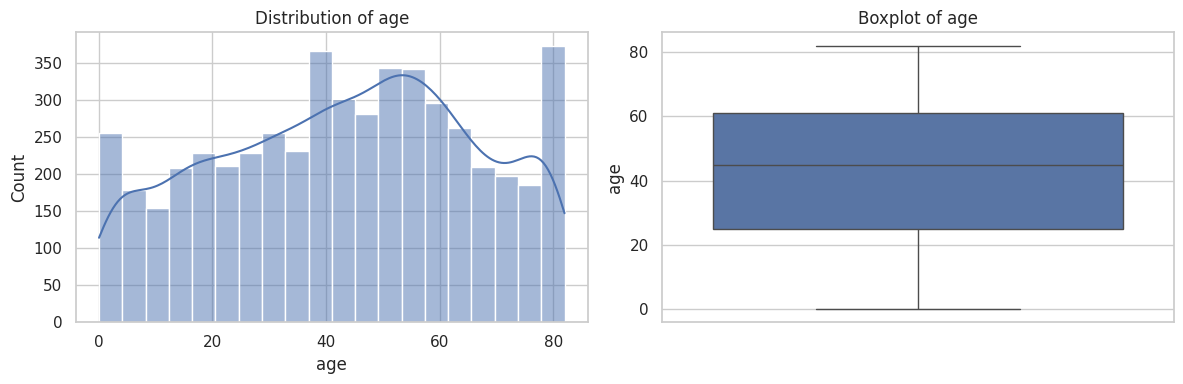


Descriptive statistics for age:


count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

--------------------------------------------------


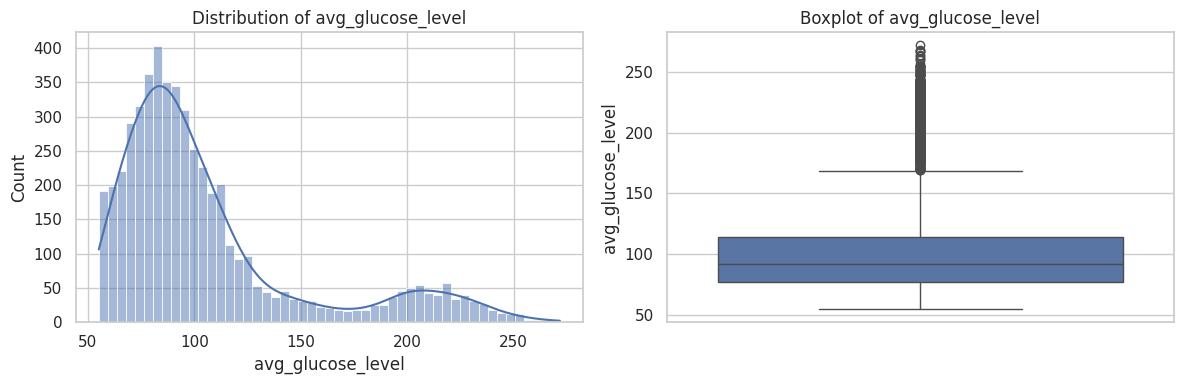


Descriptive statistics for avg_glucose_level:


count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

--------------------------------------------------


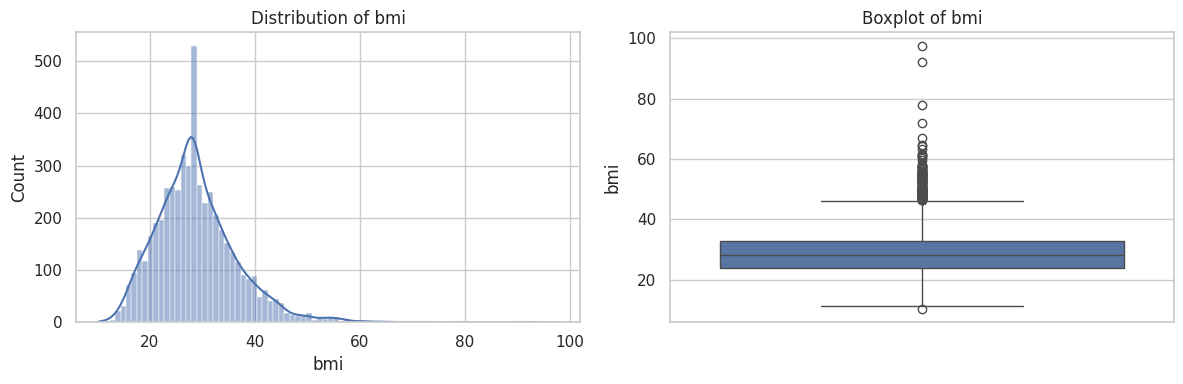


Descriptive statistics for bmi:


count    5110.000000
mean       28.862035
std         7.699562
min        10.300000
25%        23.800000
50%        28.100000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

--------------------------------------------------


In [10]:
if df is not None:
    numerical_features = ['age', 'avg_glucose_level', 'bmi']
    for col in numerical_features:
        if col in df.columns:
            plt.figure(figsize=(12, 4))

            plt.subplot(1, 2, 1) # 1 row, 2 cols, 1st plot
            sns.histplot(df[col], kde=True)
            plt.title(f'Distribution of {col}')

            plt.subplot(1, 2, 2) # 1 row, 2 cols, 2nd plot
            sns.boxplot(y=df[col])
            plt.title(f'Boxplot of {col}')
            
            plt.tight_layout() # Adjusts plot to prevent overlap
            plt.show()

            print(f"\nDescriptive statistics for {col}:")
            display(df[col].describe())
            print("-" * 50)

Variables Categóricas (Gráficos de Barras/Conteo):
gender, hypertension, heart_disease, ever_married, work_type, Residence_type, smoking_status, y nuestra variable objetivo stroke.

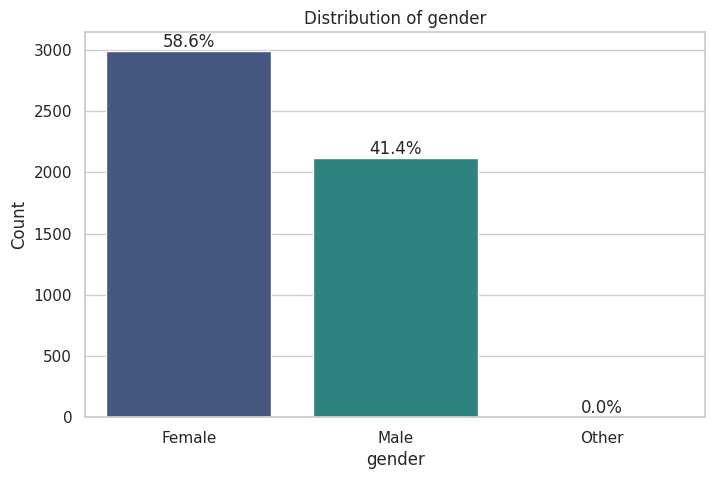


Value counts for gender:


gender
Female    58.590998
Male      41.389432
Other      0.019569
Name: proportion, dtype: float64

--------------------------------------------------


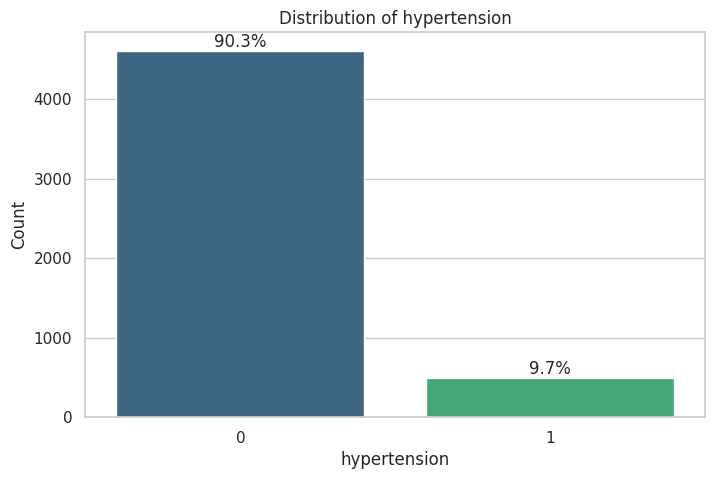


Value counts for hypertension:


hypertension
0    90.254403
1     9.745597
Name: proportion, dtype: float64

--------------------------------------------------


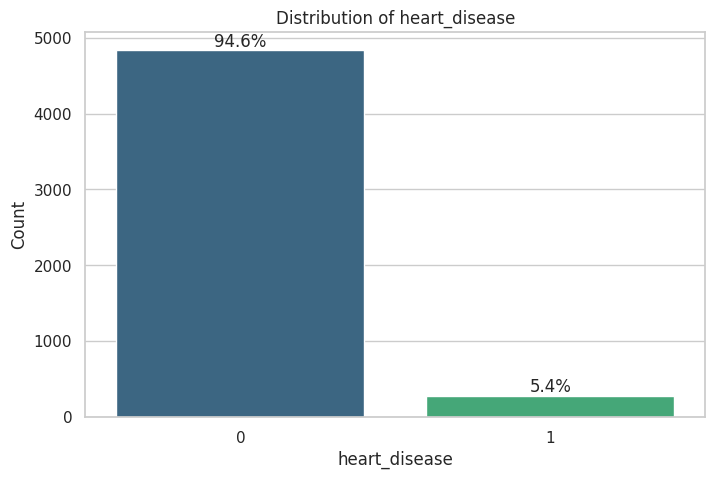


Value counts for heart_disease:


heart_disease
0    94.598826
1     5.401174
Name: proportion, dtype: float64

--------------------------------------------------


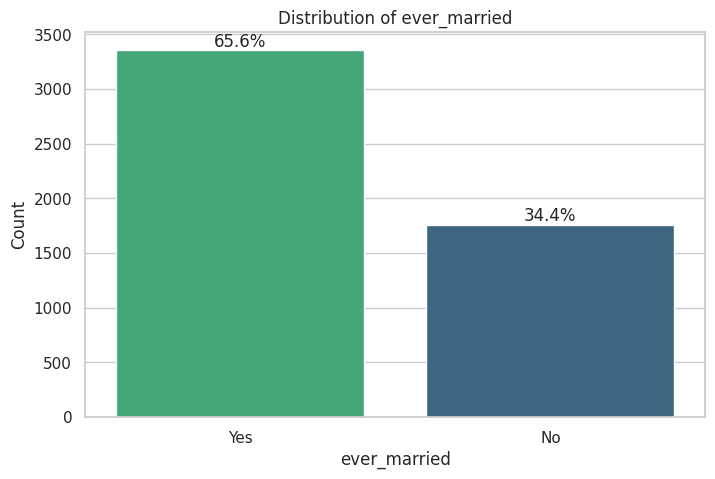


Value counts for ever_married:


ever_married
Yes    65.616438
No     34.383562
Name: proportion, dtype: float64

--------------------------------------------------


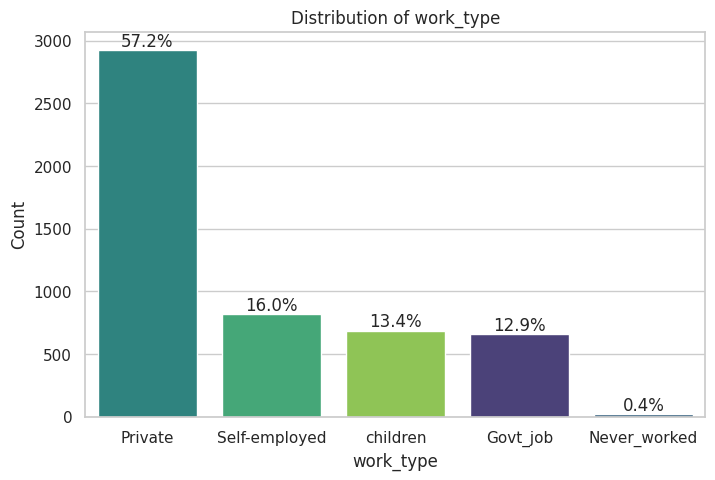


Value counts for work_type:


work_type
Private          57.240705
Self-employed    16.027397
children         13.444227
Govt_job         12.857143
Never_worked      0.430528
Name: proportion, dtype: float64

--------------------------------------------------


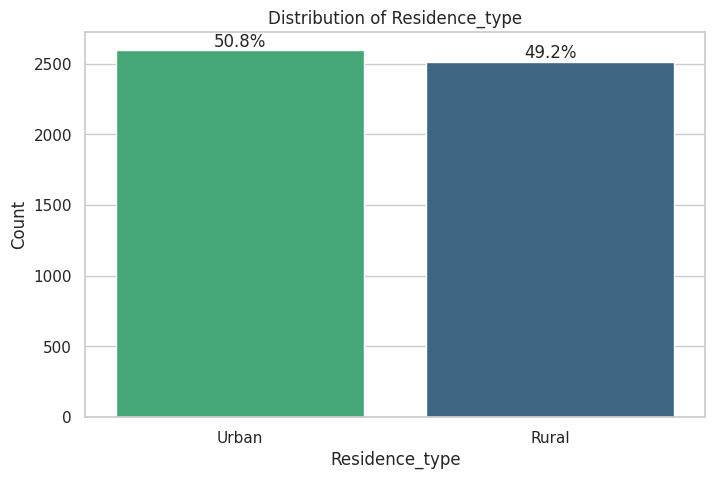


Value counts for Residence_type:


Residence_type
Urban    50.802348
Rural    49.197652
Name: proportion, dtype: float64

--------------------------------------------------


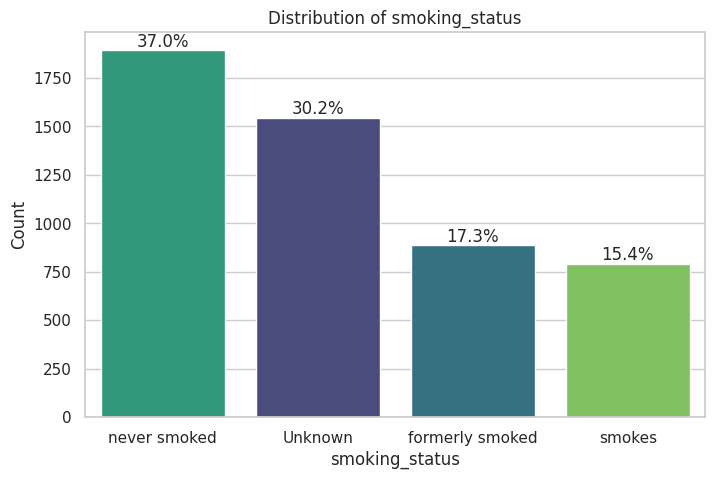


Value counts for smoking_status:


smoking_status
never smoked       37.025440
Unknown            30.215264
formerly smoked    17.318982
smokes             15.440313
Name: proportion, dtype: float64

--------------------------------------------------


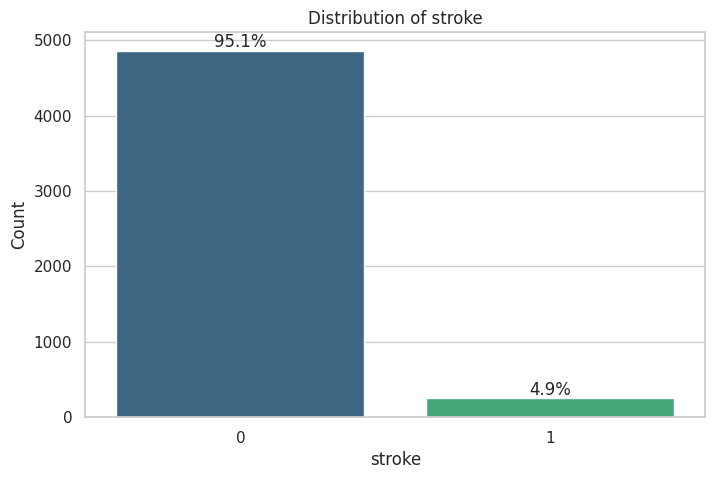


Value counts for stroke:


stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64

--------------------------------------------------


In [11]:
if df is not None:
    categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                            'work_type', 'Residence_type', 'smoking_status', 'stroke']
    for col in categorical_features:
        if col in df.columns:
            plt.figure(figsize=(8, 5))
            sns.countplot(x=col, data=df, hue=col, palette='viridis', order=df[col].value_counts().index, legend=False)
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Count')
            # Optional: Add percentages on top of bars
            total = len(df[col])
            for p in plt.gca().patches:
                percentage = f'{100 * p.get_height() / total:.1f}%'
                x = p.get_x() + p.get_width() / 2
                y = p.get_height()
                plt.gca().annotate(percentage, (x, y), ha='center', va='bottom')
            plt.show()

            print(f"\nValue counts for {col}:")
            display(df[col].value_counts(normalize=True) * 100) # normalize=True gives percentages
            print("-" * 50)

Bivariate Analysis:
Numerical vs. Categorical (especially with the target variable stroke):
How are the numerical variables (age, avg_glucose_level, bmi) distributed for patients who had a stroke vs. those who did not?
We will use Box Plots or Violin Plots.

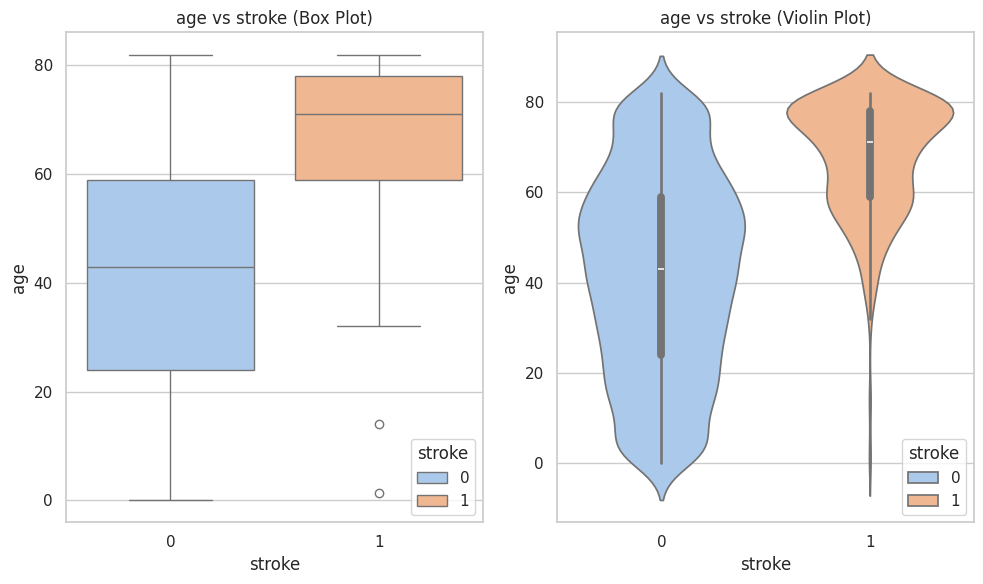


Grouped statistics for age by stroke:


,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
0,4861.0,41.971545,22.291940,0.08,24.0,43.0,59.0,82.0
1,249.0,67.728193,12.727419,1.32,59.0,71.0,78.0,82.0


------------------------------------------------------------


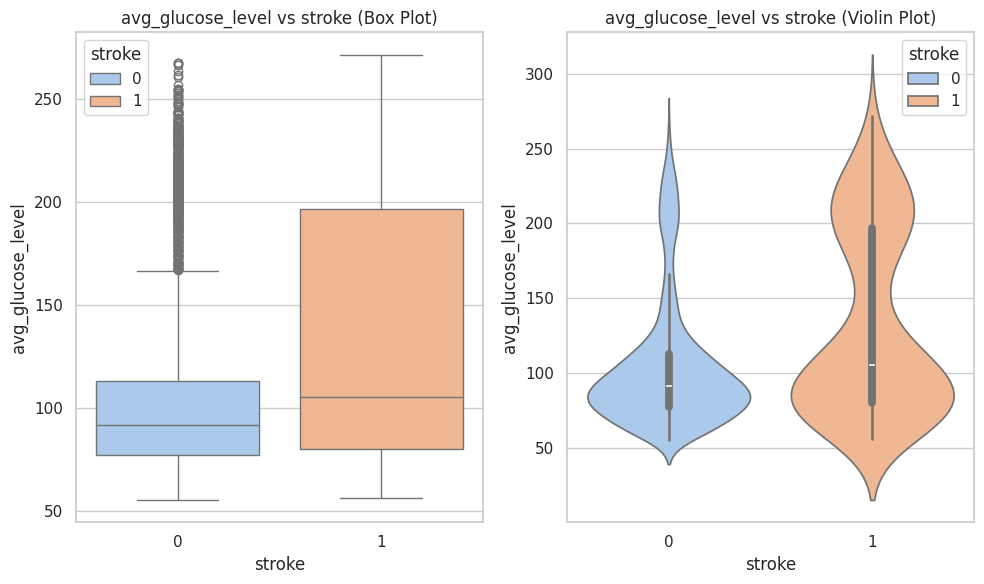


Grouped statistics for avg_glucose_level by stroke:


,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
0,4861.0,104.795513,43.846069,55.12,77.12,91.47,112.83,267.76
1,249.0,132.544739,61.921056,56.11,79.79,105.22,196.71,271.74


------------------------------------------------------------


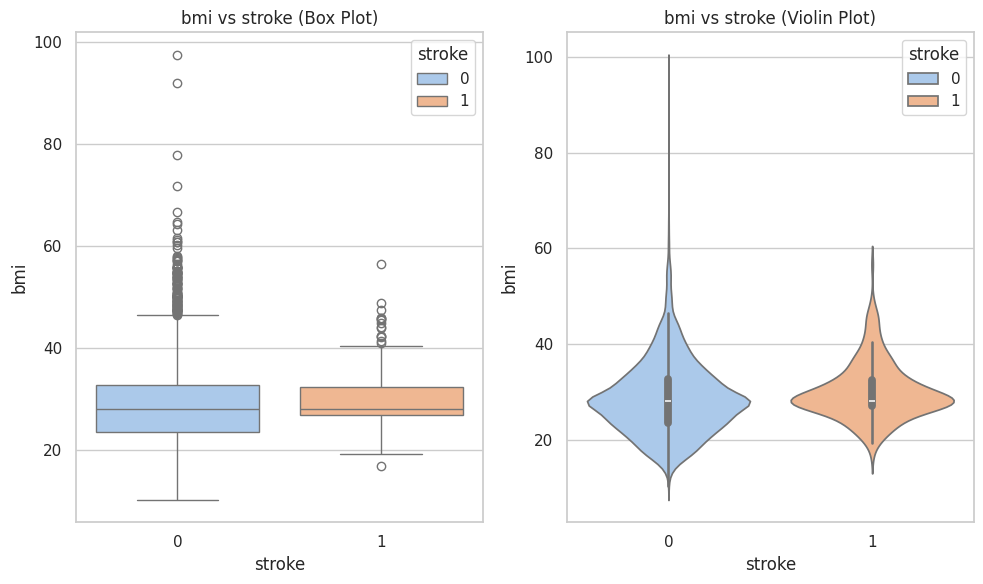


Grouped statistics for bmi by stroke:


,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
0,4861.0,28.799115,7.777269,10.3,23.6,28.1,32.8,97.6
1,249.0,30.090361,5.861877,16.9,27.0,28.1,32.5,56.6


------------------------------------------------------------


In [13]:
if df is not None:
    numerical_features = ['age', 'avg_glucose_level', 'bmi']
    target_variable = 'stroke' # Nuestra variable objetivo

    for num_col in numerical_features:
        if num_col in df.columns and target_variable in df.columns:
            plt.figure(figsize=(10, 6))
            
            plt.subplot(1, 2, 1)
            sns.boxplot(x=target_variable, y=num_col, data=df,  hue=target_variable, palette='pastel')
            plt.title(f'{num_col} vs {target_variable} (Box Plot)')
            
            plt.subplot(1, 2, 2)
            sns.violinplot(x=target_variable, y=num_col, data=df,  hue=target_variable, palette='pastel')
            plt.title(f'{num_col} vs {target_variable} (Violin Plot)')
            
            plt.tight_layout()
            plt.show()

            # Opcional: Estadísticas agrupadas
            print(f"\nGrouped statistics for {num_col} by {target_variable}:")
            display(df.groupby(target_variable)[num_col].describe())
            print("-" * 60)

Categorical vs. Categorical (especially with the target variable stroke):
How is the stroke variable distributed within each category of other categorical variables (gender, hypertension, heart_disease, ever_married, work_type, Residence_type, smoking_status)?
We will use grouped or stacked bar charts, or contingency tables (crosstabs).

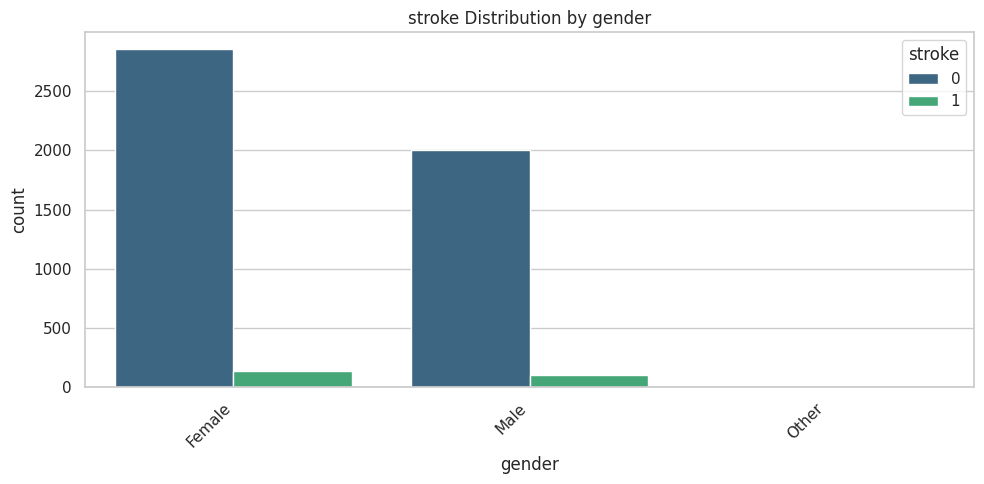


Crosstabulation: gender vs stroke (Percentages by gender)


stroke,0,1
gender,,
Female,95.290581,4.709419
Male,94.893617,5.106383
Other,100.000000,0.000000


------------------------------------------------------------


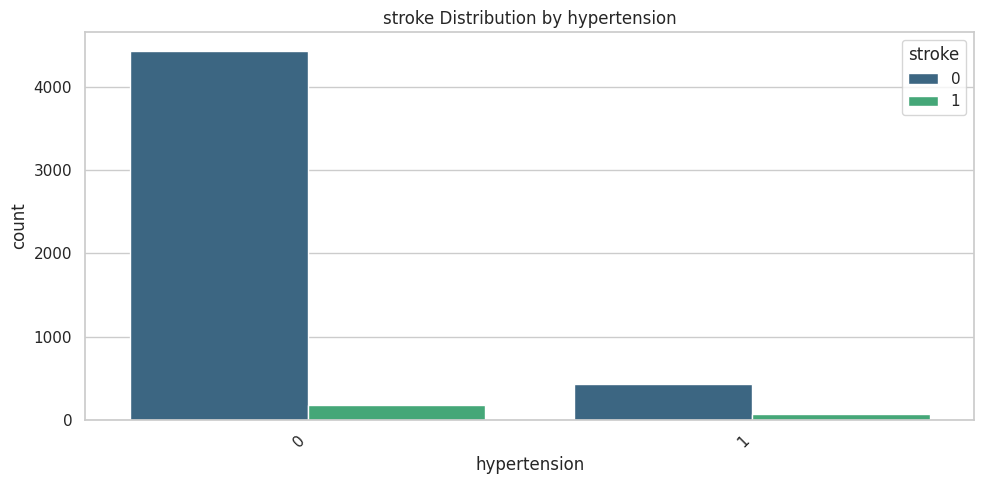


Crosstabulation: hypertension vs stroke (Percentages by hypertension)


stroke,0,1
hypertension,,
0,96.032090,3.967910
1,86.746988,13.253012


------------------------------------------------------------


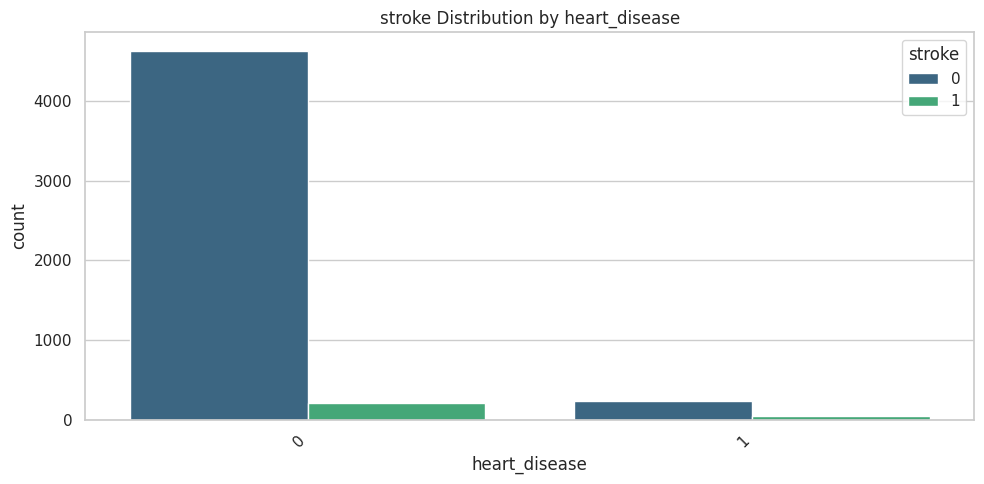


Crosstabulation: heart_disease vs stroke (Percentages by heart_disease)


stroke,0,1
heart_disease,,
0,95.821266,4.178734
1,82.971014,17.028986


------------------------------------------------------------


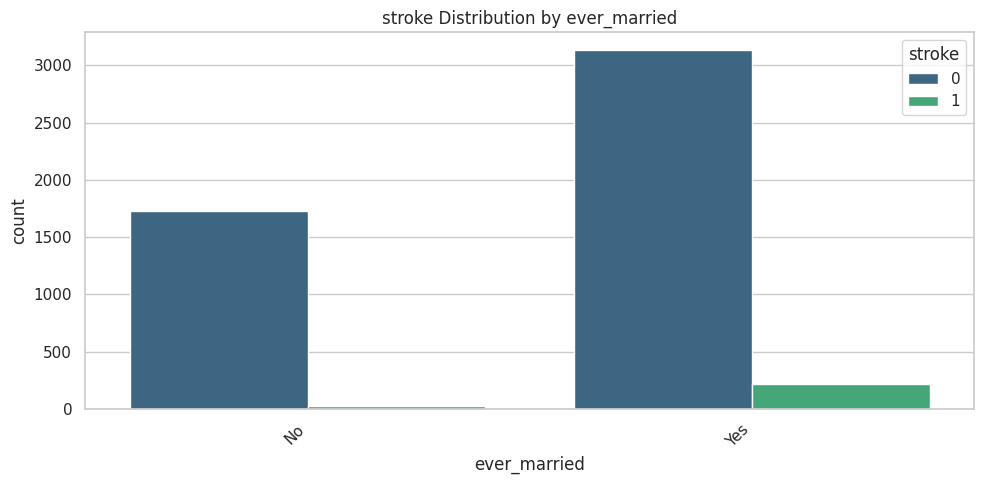


Crosstabulation: ever_married vs stroke (Percentages by ever_married)


stroke,0,1
ever_married,,
No,98.349459,1.650541
Yes,93.438712,6.561288


------------------------------------------------------------


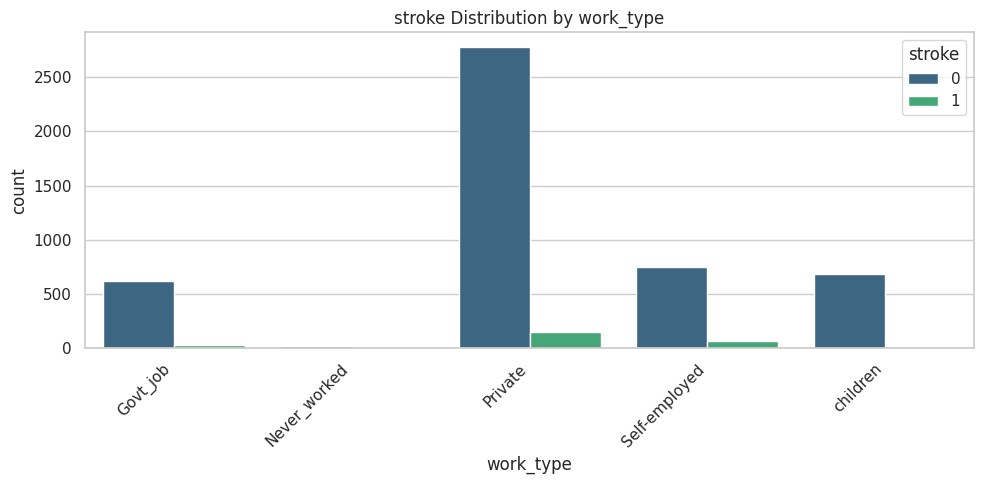


Crosstabulation: work_type vs stroke (Percentages by work_type)


stroke,0,1
work_type,,
Govt_job,94.977169,5.022831
Never_worked,100.000000,0.000000
Private,94.905983,5.094017
Self-employed,92.063492,7.936508
children,99.708879,0.291121


------------------------------------------------------------


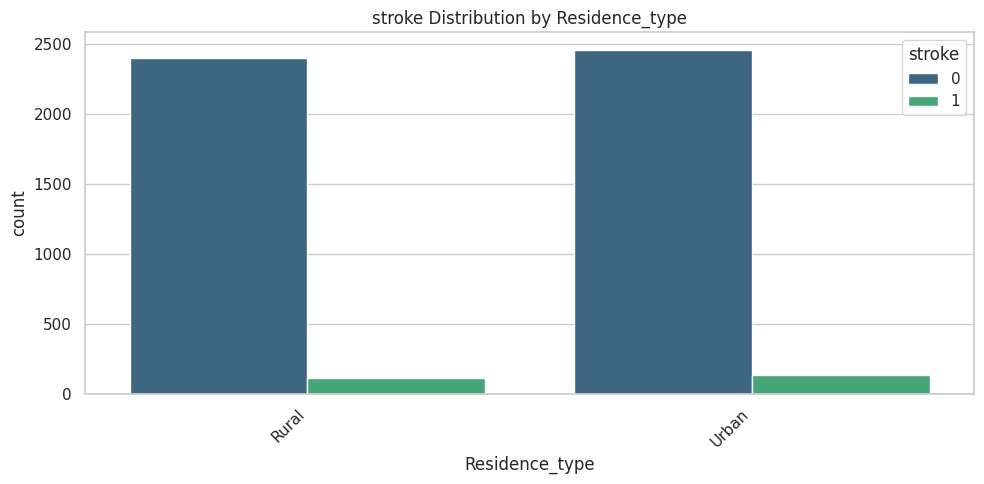


Crosstabulation: Residence_type vs stroke (Percentages by Residence_type)


stroke,0,1
Residence_type,,
Rural,95.465394,4.534606
Urban,94.799692,5.200308


------------------------------------------------------------


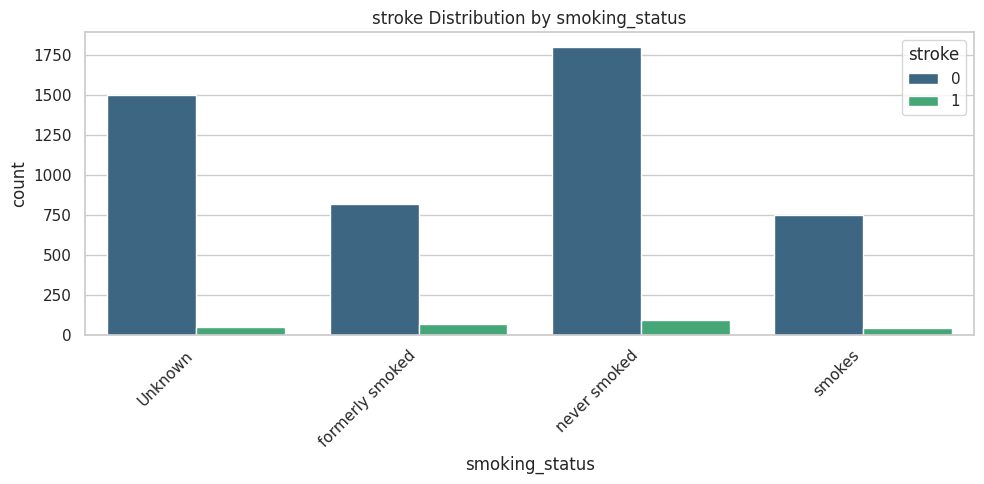


Crosstabulation: smoking_status vs stroke (Percentages by smoking_status)


stroke,0,1
smoking_status,,
Unknown,96.955959,3.044041
formerly smoked,92.090395,7.909605
never smoked,95.243129,4.756871
smokes,94.676806,5.323194


------------------------------------------------------------


In [15]:
if df is not None:
    categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                            'work_type', 'Residence_type', 'smoking_status']
    target_variable = 'stroke'

    for cat_col in categorical_features:
        if cat_col in df.columns and target_variable in df.columns:
            plt.figure(figsize=(10, 5))
            # Grafico de barras mostrando el conteo de stroke (0 y 1) para cada categoria de cat_col
            sns.countplot(x=cat_col, hue=target_variable, data=df, palette='viridis')
            plt.title(f'{target_variable} Distribution by {cat_col}')
            plt.xticks(rotation=45, ha='right') # Rotate labels if they overlap
            plt.tight_layout()
            plt.show()

            # Tabla de contingencia (crosstab) para ver porcentajes
            print(f"\nCrosstabulation: {cat_col} vs {target_variable} (Percentages by {cat_col})")
            crosstab_df = pd.crosstab(df[cat_col], df[target_variable], normalize='index') * 100
            display(crosstab_df.style.background_gradient(cmap='Blues')) # Pretty print
            print("-" * 60)

Numerical vs. Numerical:
Is there a correlation between the numerical variables?
We will use scatter plots and a correlation matrix.

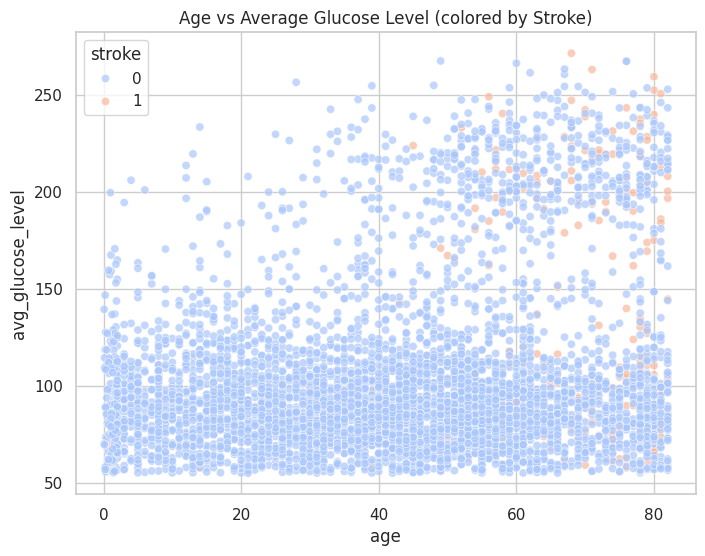


Correlation matrix of numerical features:


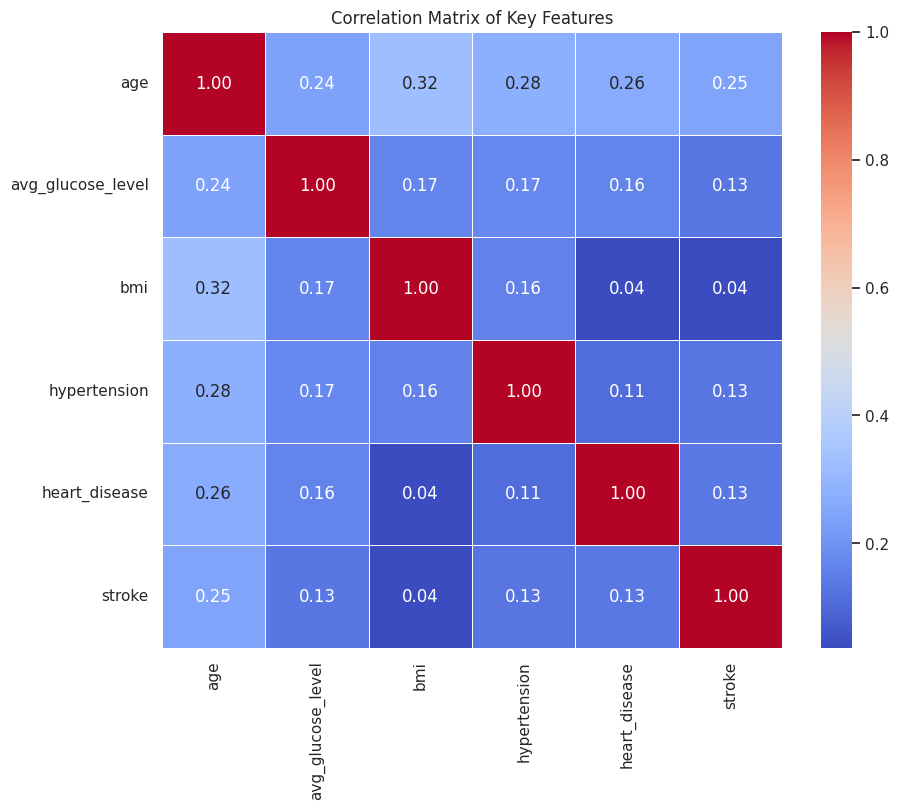

,age,avg_glucose_level,bmi,hypertension,heart_disease,stroke
age,1.000000,0.238171,0.324296,0.276398,0.263796,0.245257
avg_glucose_level,0.238171,1.000000,0.166876,0.174474,0.161857,0.131945
bmi,0.324296,0.166876,1.000000,0.158293,0.036916,0.036110
hypertension,0.276398,0.174474,0.158293,1.000000,0.108306,0.127904
heart_disease,0.263796,0.161857,0.036916,0.108306,1.000000,0.134914
stroke,0.245257,0.131945,0.036110,0.127904,0.134914,1.000000


In [16]:
if df is not None:
    numerical_features_for_corr = ['age', 'avg_glucose_level', 'bmi'] # Podrías incluir 'hypertension', 'heart_disease', 'stroke' si las consideras numéricas (0/1)
    
    # Scatter plot (ejemplo entre age y avg_glucose_level)
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='age', y='avg_glucose_level', hue=target_variable, palette='coolwarm', alpha=0.7)
    plt.title('Age vs Average Glucose Level (colored by Stroke)')
    plt.show()

    # Matriz de Correlación
    print("\nCorrelation matrix of numerical features:")
    # Selecciona solo columnas numericas para la matriz de correlacion
    # df_numeric = df[numerical_features_for_corr + [target_variable]] # Asegurarse que target_variable este para ver su correlacion
    # df_numeric = df.select_dtypes(include=np.number) # Manera mas general de tomar solo las numericas
    
    # Para el dataset de stroke, las binarias (hypertension, heart_disease, stroke) también son numéricas
    cols_for_corr = ['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke']
    corr_matrix = df[cols_for_corr].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Matrix of Key Features')
    plt.show()

    display(corr_matrix)

Análisis Multivariado (Ejemplos Introductorios):
Este tipo de análisis implica mirar más de dos variables a la vez. El pairplot que vimos antes es una forma de análisis multivariado. También podemos usar hue en otros gráficos para añadir una tercera dimensión.

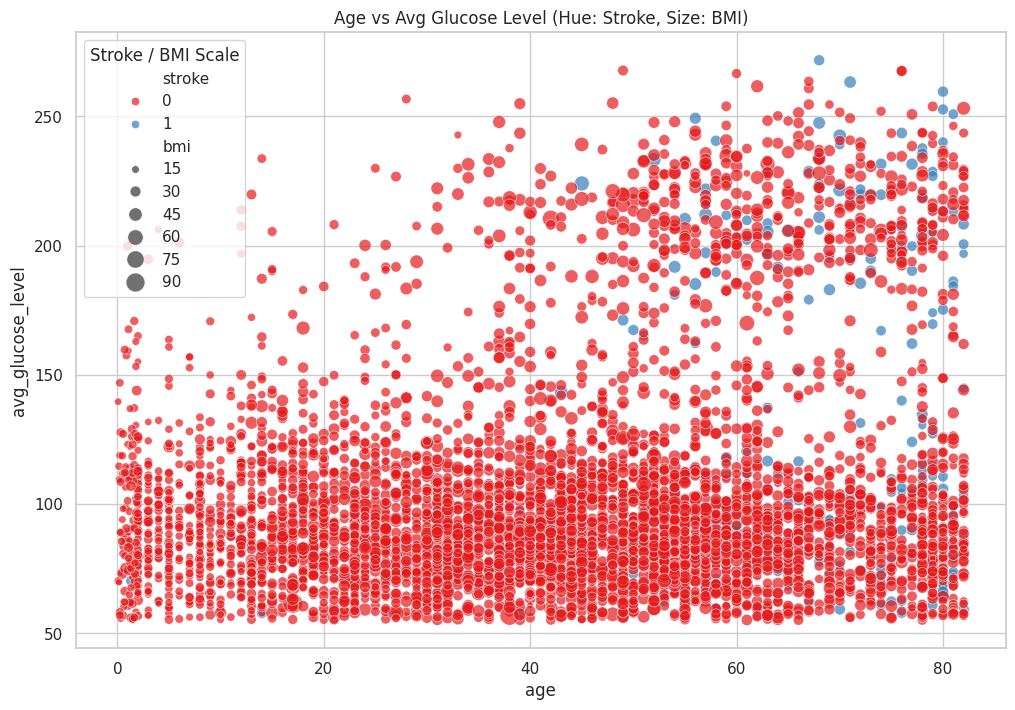

In [17]:
if df is not None and 'age' in df.columns and 'avg_glucose_level' in df.columns and 'bmi' in df.columns and 'stroke' in df.columns:
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=df, 
                    x='age', 
                    y='avg_glucose_level', 
                    hue='stroke',  # Color por stroke
                    size='bmi',    # Tamaño del punto por bmi
                    sizes=(20, 200), # Rango de tamaños de los puntos
                    palette='Set1', 
                    alpha=0.7)
    plt.title('Age vs Avg Glucose Level (Hue: Stroke, Size: BMI)')
    plt.legend(title='Stroke / BMI Scale')
    plt.show()